In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn import preprocessing
import seaborn as sns
import sklearn

import numpy as np
import pandas as pd

# Spis Treści
1. Metoda K-średnich (powtórzenie)
2. DBSCAN
3. GMM
4. Standaryzacja

Przygotowanie danych:

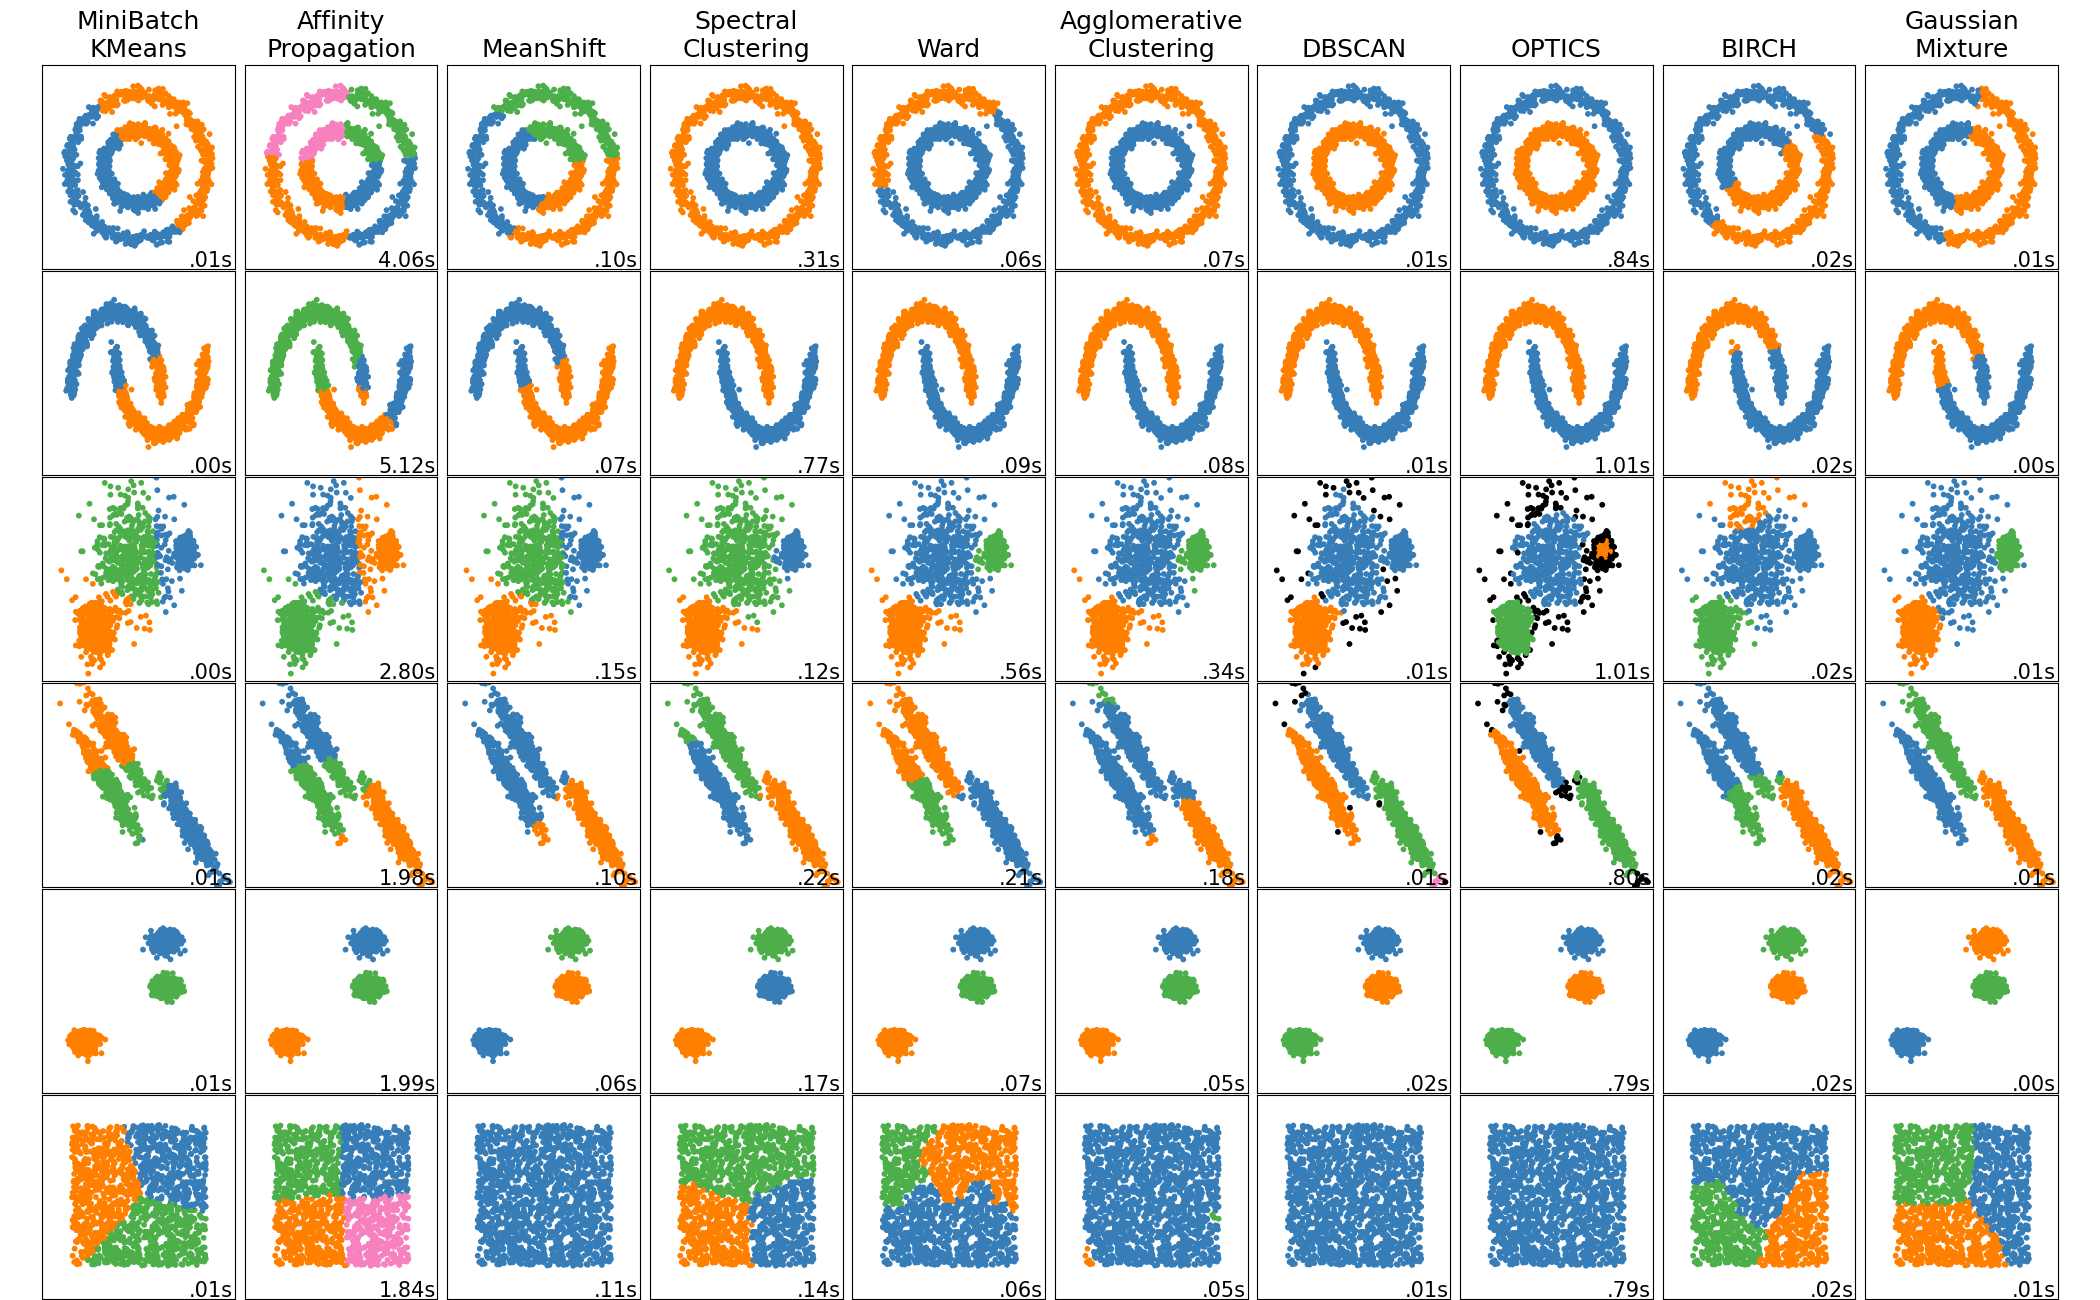

źródło: https://scikit-learn.org/stable/modules/clustering.html

In [2]:
# Przygotowanie danych
n_samples = 1500
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, _)

X, _ = datasets.make_blobs(n_samples=n_samples, random_state=1)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso_noisy = np.dot(X, transformation)
aniso_noisy = (X_aniso, _)

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)

X_batch_blobs, y_batch_blobs= datasets.make_blobs(n_samples=np.linspace(1000, 21000, 11, dtype=int),
                                                  random_state=8, center_box=(-100, 100),
                                                  cluster_std=np.linspace(1, 5, 11))

noisy_circles


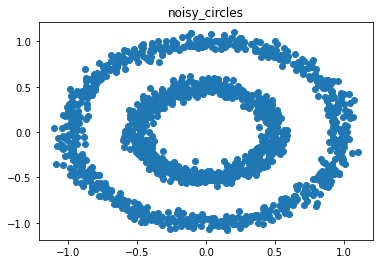

noisy_moons


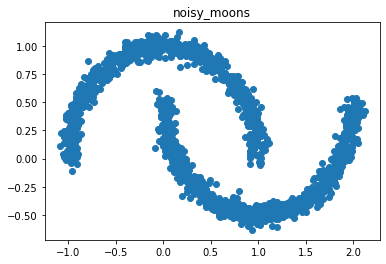

blobs


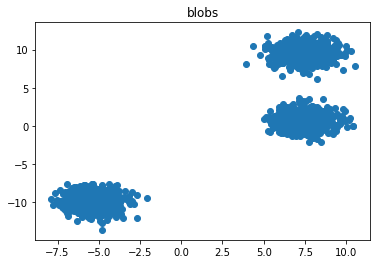

no_structure


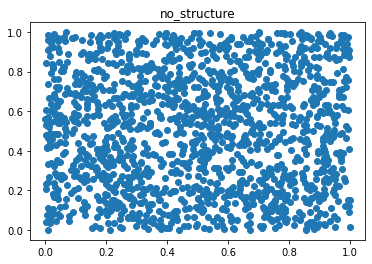

aniso


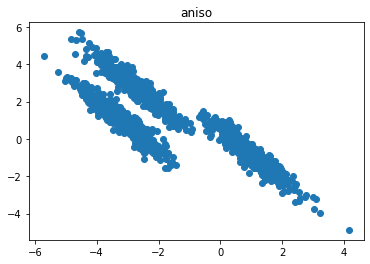

aniso_noisy


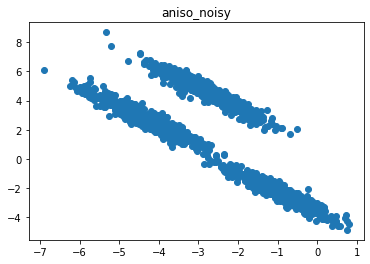

varied


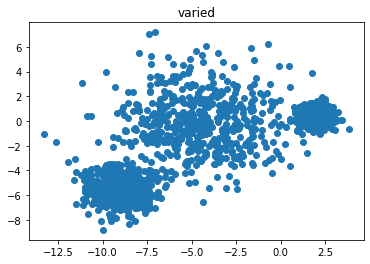

X_batch_blobs


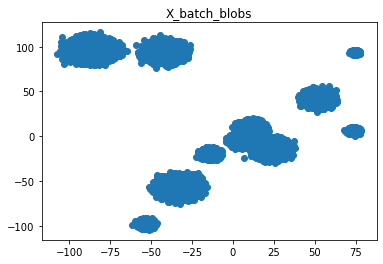

In [3]:
list_datasets = [noisy_circles, noisy_moons, blobs, no_structure[0], X_aniso, X_aniso_noisy, varied[0], X_batch_blobs]
list_title = ["noisy_circles", "noisy_moons", "blobs", "no_structure", "aniso", "aniso_noisy", "varied", "X_batch_blobs"]
k = 0
for k in range(len(list_datasets)):
    print(list_title[k])
    plt.scatter(list_datasets[k][:, 0], list_datasets[k][:, 1])
    plt.title(list_title[k])
    plt.show()

## Metoda K-średnich <a name="kmeans"></a>




Przypomnienie:  
![](https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif)
<div align="center">Żródło: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68</div>

**Zalety?**
- niska złożoność, a co za tym idzie wysoka wydajność działania,
- działa szybko przy dużych zbiorach i niskich ilościach grup,
- pogrupowane zbiory są z reguły bardziej ciaśniejsze i zbite.

**Wady?**
- nie pomaga w określeniu ilości grup (K),
- różne wartości początkowe prowadzą do różnych wyników,
- działa dobrze tylko dla „sferycznych” skupisk o jednorodnej gęstości.

**Pytania – co można poprawić?**
- Co zrobić jeśli mamy bardzo dużo danych?
- Co jeśli dane nie są sferyczne?
- Może automatyczna detekcja liczby skupień?


## Optymalna liczba klastrów dla k-Means

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

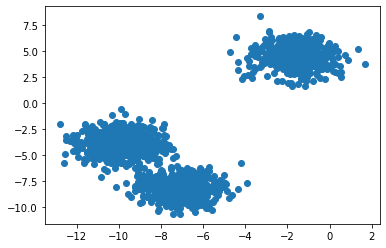

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(X))
        score_kmeans_s.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(X, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(X, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

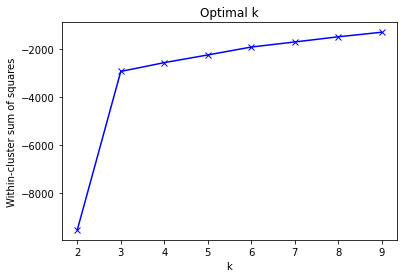

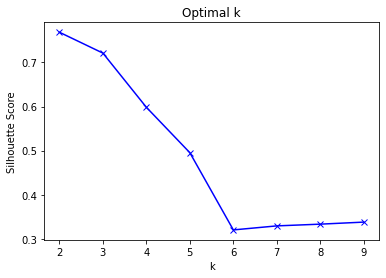

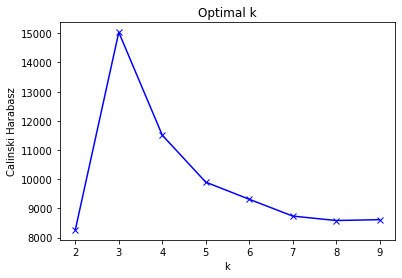

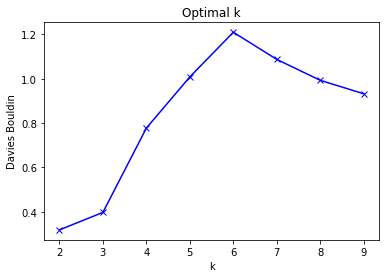

In [7]:
metrics_plots(max_k=10)

### Metoda Mini Batch <a name="mbkmeans"></a>
Modyfikacja popularnego algorytm klastrowania k-Mean. W efekcie często otrzymujemy lepsze podziały na klastry oraz charakteryzuje się szybszym czasem działania.
patrz: https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf (Sculley2010)

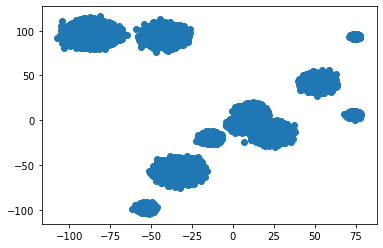

In [8]:
plt.scatter(X_batch_blobs[:,0], X_batch_blobs[:,1])
plt.show()

In [9]:
def _KMeans(X, n_clusters):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return X, kmeans

def _MiniBatchKMeans(X, n_clusters):
    miniBatchKmeans = cluster.MiniBatchKMeans(n_clusters=n_clusters)
    miniBatchKmeans.fit(X)
    return X, miniBatchKmeans

Porównanie czasów działania:

In [10]:
%%time
for k in range(5):
    kmeans=_KMeans(X_batch_blobs, n_clusters=11)

Wall time: 8.35 s


In [11]:
%%time
for k in range(5):
    batch_kmeans=_MiniBatchKMeans(X_batch_blobs, n_clusters=11)

C:\Users\malys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\malys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\malys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\m

Wall time: 1.08 s


In [12]:
def plot_clusters(X, model, title="", **kwargs):
    if hasattr(model, 'labels_'):
        y_pred = model.labels_.astype(np)
    else:
        y_pred = model.predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='viridis', **kwargs)
    plt.title(title)
    plt.show()

Wizualizacja podziału:

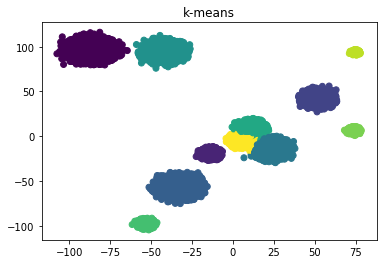

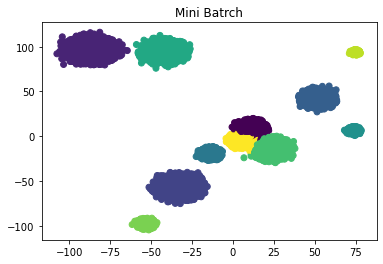

In [13]:
plot_clusters(title="k-means",*kmeans)
plot_clusters(title="Mini Batrch",*batch_kmeans)

## DBSCAN  <a name="DBSCAN"></a>
### Density-based spatial clustering of applications with noise 

DBSCAN prezentuje inne podejście do problemów analizy skupień, oparte na analizie gęstości.

Dwa podstawowe parametry:
 - $\varepsilon$
 - $\texttt{minPts}$

Sposób działania:

   1. Znajdź punkty w sąsiedztwie ($\varepsilon$) każdego punktu, znajdź "punkty bazowe/rdzeniowe" (ang. core points) mające więcej niż $\texttt{minPts}$ sąsiadów.
   2. Znajdź spójne składowe punktów rdzeniowych, pomijając wszystkie pozostałe punkty,
   3. Przypisz każdy pozostały punkt do najbliższego klastra, jeśli jest w jego sąsiedztwie, w przeciwnym wypadku oznacz go jako szum/obserwację odstającą.
  


<img src="https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg" alt="drawing" width="400"/>

Na powyższym diagramie $\texttt{minPts} = 4$. Punkt A oraz inne czerwone punkty są punktami bazowymi, ponieważ w ich obszarach rozmiaru $\varepsilon$ wokół nich znajdują się co najmniej 4 punkty (wliczając siebie). Ponieważ są one 'osiągalne' (ang. *reachable*) od siebie, tworzą pojedynczy klaster. Punkty B i C nie są punktami bazowymi, ale są osiągalne z punktu A (poprzez inne punkty bazowe) więc również należą do tego klastra. Punkt N jest obserwacją odstającą, ponieważ nie jest punktem bazowym ani nie jest bezpośrednio osiągalny z żadnego punktu bazowego.

Gdyby punkt N znajdował się w żółtym okręgu wokół punktu B ale poza czerwonymi okręgami, to nadal byłby obserwacją odstającą, gdyż nie można by było stworzyć do niego 'ścieżki' prowadzącej przez punkty bazowe. 

Źródło ilustracji: https://en.wikipedia.org/wiki/DBSCAN (Ester1996)

### Przykład <a name="DBSCAN_example"></a>

In [14]:
def _DBSCAN(X, eps=0.3):
    dbs = cluster.DBSCAN(eps=eps)
    dbs.fit(X)
    return X, dbs

Podstawowe parametry *sklearn.cluster.DBSCAN*: 

`eps` default=0.5  
`min_samples` default=5   
`metric` default = 'euclidean'  

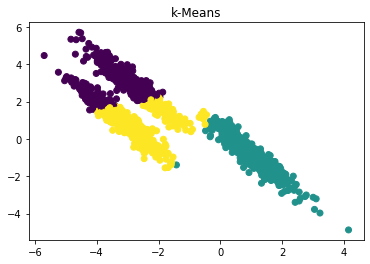

In [15]:
plot_clusters(title="k-Means", *_KMeans(X_aniso, n_clusters=3))

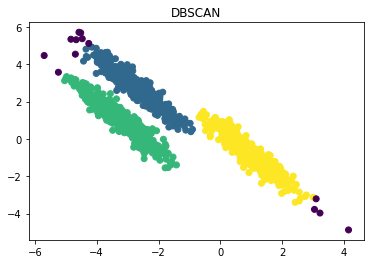

In [16]:
plot_clusters(*_DBSCAN(X_aniso, eps=0.35), title="DBSCAN")

### Jak dobrać $\texttt{minPts}$ oraz $\varepsilon$?

Autorzy pracy wprowadzającej DBSCAN proponują następującą metodę wyboru odpowiednich wartości $\texttt{minPts}$ oraz $\varepsilon$:
1. Ustaw $\texttt{minPts}$ na podwojony wymiar danych (np. dla danych dwuwymiarowych $\texttt{minPts}=4$).
2. Dla każdego punktu oblicz odległość do $(\texttt{minPts} − 1)$ najbliższego sąsiada (różnego od ustalonego punktu).
3. Otrzymane odległości od największej i przedstaw na wykresie: na osi $x$ znajdują się numery punktów (po sortowaniu), a na osi $y$ odległości tych punktów od najbliższych sąsiadów.
4. Obserwacje po lewej stronie wykresu znajdują się daleko od swoich sąsiadów, więc można uznać że są odstające. Znajdź ostatni 'duży skok' (lub łokieć) na wykresie i wybierz wartość odległości jako $\varepsilon$. Obserwacje po lewej stronie tego skoku będą zaklasyfikowane jako odstające a na prawo trafią do klastrów. 


<img src="./wykres-db.png" alt="drawing" width="500"/>

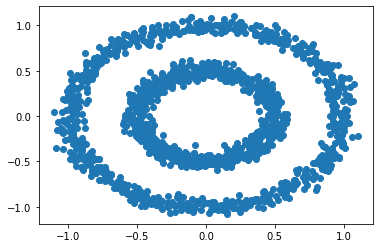

In [17]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1])

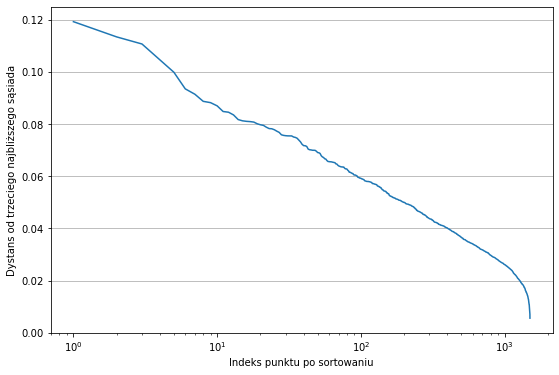

In [18]:
minPts = 4
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(noisy_circles)
distances, indices = nbrs.kneighbors(noisy_circles)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,noisy_circles.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

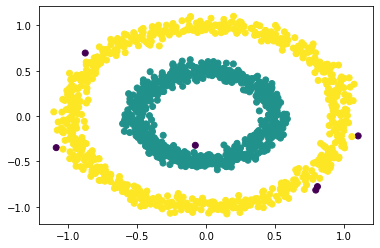

In [19]:
eps = 0.08

dbs = cluster.DBSCAN(eps=eps, min_samples=minPts)
dbs.fit(noisy_circles)

plot_clusters(noisy_circles, dbs)

### Więcej <a name="DBSCAN_sources"></a>  

 - https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/DBScan_Clustering.ipynb

 - Przykład z dokumentacji: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
 
 - DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN (2017): https://dl.acm.org/doi/10.1145/3068335

## GMM (Gaussian Mixture Models) <a name="GMM"></a>

Jeszcze inne podejście oparte na modelowaniu skupień przy pomocy rozkładów normalnych.

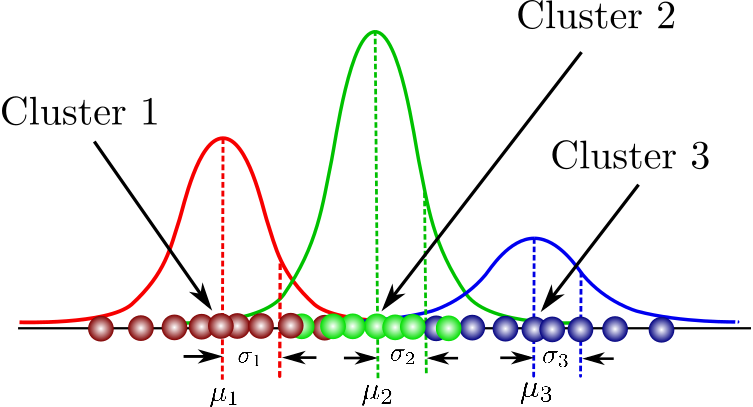

Źródło:https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

Dla **K** klastrów mamy **K** funkcji o 3 podstawowych parametrach:
 - $\mu$ - średnia określająca centrum,
 - $\Sigma$ - macierz kowariancji, określająca szerokość. W wielu wymiarach określa wymiary elipsoidy. 
 - $\pi$ - określa wysokość, $$\sum_{i}^{K}  \pi_{i} = 1$$
 
 $$p(x) = \sum_{i}^{K} \pi_{i} \mathcal{N}(\mu_{i}, \Sigma_{i})$$

W przeciwieństwie do pozostałych algorytmów zwraca prawdopodobieństwo przyporządkowania obserwacji do określonego skupienia.

Zalety:
 - rozpoznaje klastry o mniejszej gęstości,
 - rozpoznaje klastry inne niż tylko sferyczne,
 - przypadki, w których możemy wykorzystać przyporządkowanie do wielu skupień na raz.

### Przykład <a name="GMM_example"></a>

In [20]:
data_varied = varied[0]

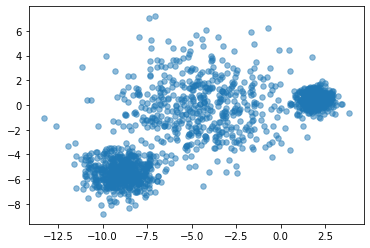

In [21]:
plt.scatter(data_varied[:,0], data_varied[:,1], alpha=0.5, s=30)
plt.show()

Jak sobie poradzi DBSCAN?

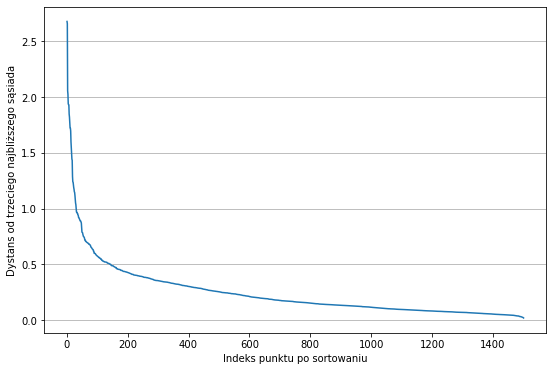

In [22]:
minPts = 4
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(data_varied)
distances, indices = nbrs.kneighbors(data_varied)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,data_varied.shape[0]+1)), distanceDec)

#plt.xscale('log')

plt.grid(axis='y')

plt.show()

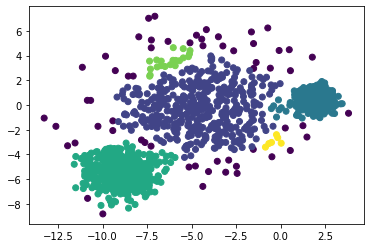

In [23]:
eps = 0.6

dbs = cluster.DBSCAN(eps=eps, min_samples=minPts)
dbs.fit(data_varied)

plot_clusters(data_varied, dbs)

Jak sobie poradzi KNN?

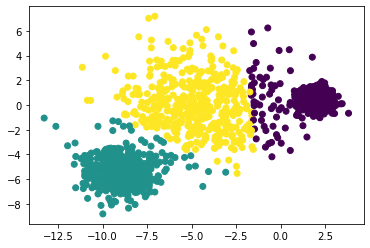

In [24]:
plot_clusters(*_KMeans(data_varied, n_clusters=3))

Jak sobie poradzi GMM?

In [25]:
def _GMM(X, n_components, covariance_type='full'):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X)
    return X, gmm

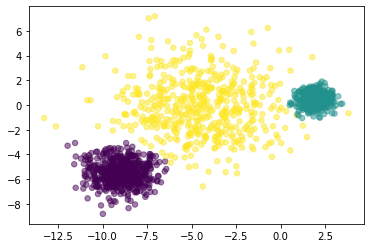

In [26]:
plot_clusters(*_GMM(data_varied, n_components=3), alpha=0.5, s=30)

### Zadania 

Przetestuj metody dla poniższych 3 zbiorów.

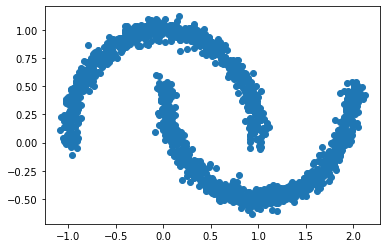

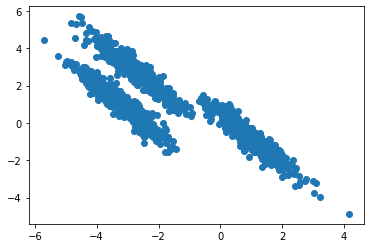

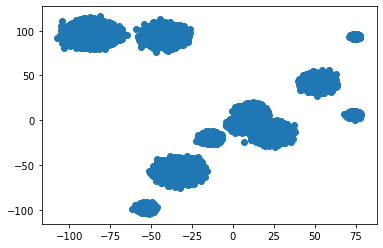

In [27]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])
plt.show()
plt.scatter(aniso_noisy[0][:,0], aniso_noisy[0][:,1])
plt.show()
plt.scatter(X_batch_blobs[:,0], X_batch_blobs[:,1])
plt.show()

Więcej: <a name='GMM_sources'></a>
   - https://www.kaggle.com/sid321axn/customer-segments-gmm-vs-k-means-clustering
   - https://github.com/duducheng/clustering_tutorial/blob/master/2_Gaussian_Mixture_and_EM.ipynb